In [ ]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [7]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [9]:
#Assign weights to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [10]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [11]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-04-06'

In [12]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [13]:
#Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.230000,213.850006,16.316067,9.994286,299.078979
2012-05-21,34.029999,218.110001,17.266645,10.248571,305.908386
2012-05-22,31.000000,215.330002,17.134058,9.672857,299.278229
2012-05-23,32.000000,217.279999,17.552126,10.272857,303.592072
2012-05-24,33.029999,215.240005,17.390926,10.038571,300.702881
...,...,...,...,...,...
2021-03-29,290.820007,3075.729980,121.389999,513.950012,2055.949951
2021-03-30,288.000000,3055.290039,119.900002,513.390015,2055.540039
2021-03-31,294.529999,3094.080078,122.150002,521.659973,2068.629883


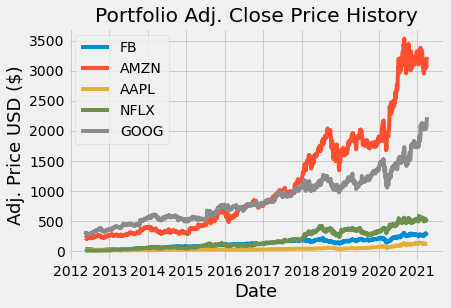

In [14]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [15]:
#Show the daily simply return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.019920,0.058260,0.025443,0.022835
2012-05-22,-0.089039,-0.012746,-0.007679,-0.056175,-0.021674
2012-05-23,0.032258,0.009056,0.024400,0.062029,0.014414
2012-05-24,0.032187,-0.009389,-0.009184,-0.022806,-0.009517
...,...,...,...,...,...
2021-03-29,0.027560,0.007765,0.001485,0.011613,0.010022
2021-03-30,-0.009697,-0.006646,-0.012274,-0.001090,-0.000199
2021-03-31,0.022674,0.012696,0.018766,0.016109,0.006368


In [21]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.139290,0.051707,0.043106,0.052210,0.047719
AMZN,0.051707,0.091781,0.039768,0.063900,0.046521
AAPL,0.043106,0.039768,0.082629,0.036533,0.038172
NFLX,0.052210,0.063900,0.036533,0.228499,0.048737
GOOG,0.047719,0.046521,0.038172,0.048737,0.065708


In [22]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06178598596439614

In [23]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24856786993575042

In [17]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.35018328659499387

In [19]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 35.0%
Annual volatility / risk: 25.0%
Annual variance: 6.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('FB', 0.0), ('AMZN', 0.37856), ('AAPL', 0.21859), ('NFLX', 0.32369), ('GOOG', 0.07916)])
Expected annual return: 39.7%
Annual volatility: 27.5%
Sharpe Ratio: 1.37


(0.396831782821942, 0.27472178698538285, 1.3716851035261797)

In [ ]:
#Highlight total  copy and paste and must add to 1 



In [19]:
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)


allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AMZN': 2, 'AAPL': 27, 'NFLX': 9}
Funds remaining: $281.21
